In [163]:
#importing data using pandas
import pandas as pd
df=pd.read_csv('/content/Drug_clean.csv')

In [164]:
df.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


In [165]:
df.shape

(685, 10)

In [166]:
#there are no null values
df.isnull().sum()

Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      0
Price           0
Reviews         0
Satisfaction    0
Type            0
dtype: int64

In [167]:
#data types
df.dtypes

Condition        object
Drug             object
EaseOfUse       float64
Effective       float64
Form             object
Indication       object
Price           float64
Reviews         float64
Satisfaction    float64
Type             object
dtype: object

In [168]:
#checking for outliers
df.describe()

,EaseOfUse,Effective,Price,Reviews,Satisfaction
count,685.000000,685.000000,685.000000,685.000000,685.000000
mean,3.920038,3.523530,174.211183,82.644410,3.195699
std,0.894212,0.954126,667.743466,273.281398,1.030442
min,1.000000,1.000000,4.000000,1.000000,1.000000
25%,3.556667,3.000000,15.490000,3.000000,2.575000
50%,4.050000,3.600000,49.990000,10.350877,3.200000
75%,4.500000,4.110000,145.990000,57.000000,3.901250
max,5.000000,5.000000,10362.190000,4647.000000,5.000000


In [169]:
df.corr()
#On seeing the given data Easeofuse and Satisfaction had a Good correlation and Effectiveness & Satisfaction had high correlation

,EaseOfUse,Effective,Price,Reviews,Satisfaction
EaseOfUse,1.000000,0.659237,-0.107480,0.011962,0.650156
Effective,0.659237,1.000000,-0.017532,-0.035802,0.864863
Price,-0.107480,-0.017532,1.000000,-0.024927,-0.024800
Reviews,0.011962,-0.035802,-0.024927,1.000000,-0.084216
Satisfaction,0.650156,0.864863,-0.024800,-0.084216,1.000000


<AxesSubplot:>

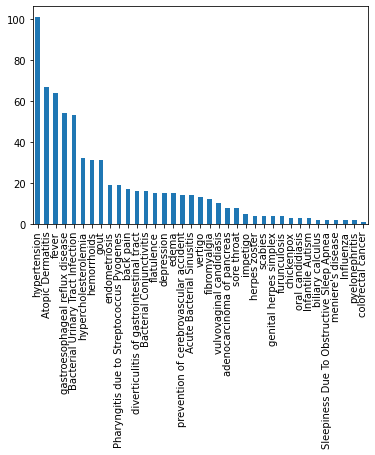

In [170]:
#EDA
df.Condition.value_counts().plot(kind='bar')
#Checking frequencies of the Disease Condition in the fiven data

## Treating Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EaseOfUse', ylabel='Density'>

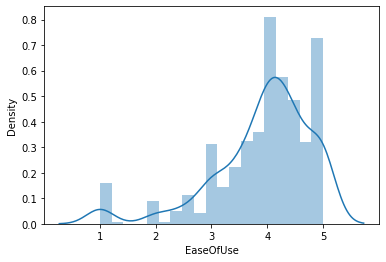

In [171]:
import seaborn as sns
#On Checking on the Ease of Use,the data seems to be skewed 
sns.distplot(df['EaseOfUse'])

In [172]:
#treating the outliers of EaseOfuse
lower_bridge=df['EaseOfUse'].quantile(0.25)-(1.5)
upper_bridge=df['EaseOfUse'].quantile(0.75)+(1.5)
print(lower_bridge)
print(upper_bridge)
df.loc[df['EaseOfUse']<=2.05,'EaseOfUse']=2.05

2.056666666666666
6.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EaseOfUse', ylabel='Density'>

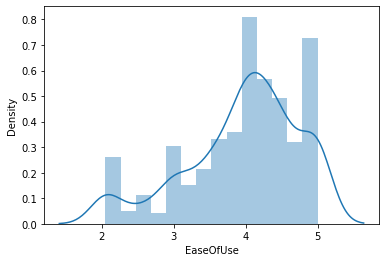

In [173]:
sns.distplot(df['EaseOfUse'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Effective', ylabel='Density'>

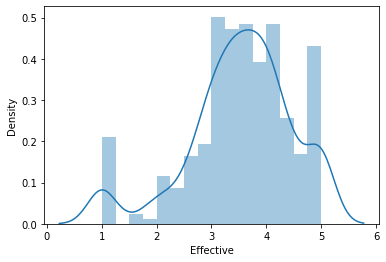

In [174]:
sns.distplot(df['Effective'])

In [175]:
lower_bridge=df['Effective'].quantile(0.25)-(1.6)
upper_bridge=df['Effective'].quantile(0.75)+(1.6)
print(lower_bridge)
print(upper_bridge)
df.loc[df['Effective']<=1.4,'Effective']=1.4  ##mean value of effective
df.loc[df['Effective']>=5.71,'Effective']=5.71

1.4
5.710000000000001


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Effective', ylabel='Density'>

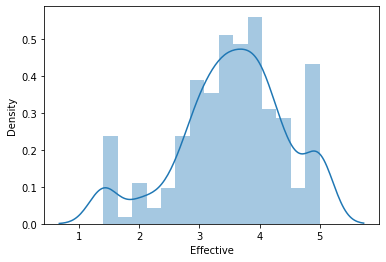

In [176]:
sns.distplot(df['Effective'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

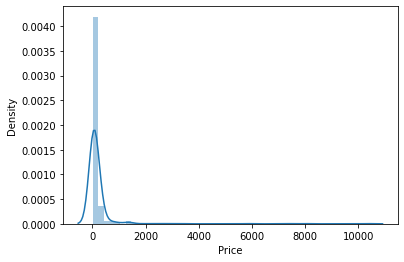

In [177]:
sns.distplot(df['Price'])

In [178]:
lower_bridge=df['Price'].quantile(0.25)-(195.75)
upper_bridge=df['Price'].quantile(0.75)+(195.75)
print(lower_bridge)
print(upper_bridge)
df.loc[df['Price']>=341.74,'Price']=341.74

-180.26
341.74


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

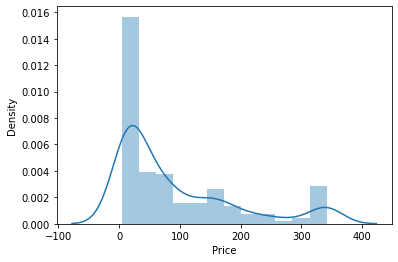

In [179]:
sns.distplot(df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

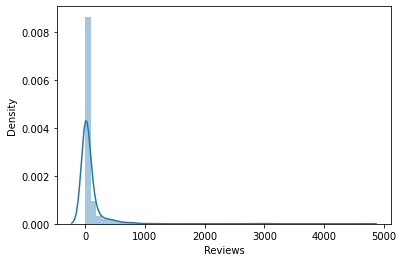

In [180]:
sns.distplot(df['Reviews'])

In [181]:
lower_bridge=df['Reviews'].quantile(0.25)-(81)
upper_bridge=df['Reviews'].quantile(0.75)+(81)
print(lower_bridge)
print(upper_bridge)
df.loc[df['Reviews']>=138,'Reviews']=138

-78.0
138.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

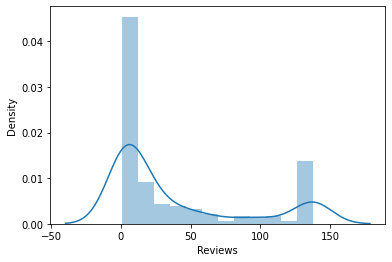

In [182]:
sns.distplot(df['Reviews'])

#Encoding

In [183]:
Condition=pd.get_dummies(df.Condition)

In [184]:
from sklearn.preprocessing import LabelEncoder

In [185]:
enc=LabelEncoder()
df['Drug']=enc.fit_transform(df['Drug'])
df['Form']=enc.fit_transform(df['Form'])
df['Indication']=enc.fit_transform(df['Indication'])
df['Type']=enc.fit_transform(df['Type'])

In [186]:
new=df.drop('Condition',axis=1)

In [187]:
final=pd.concat([Condition,new],axis='columns')

In [188]:
final.head()

,Acute Bacterial Sinusitis,Atopic Dermatitis,Bacterial Conjunctivitis,Bacterial Urinary Tract Infection,Infantile Autism,Influenza,Pharyngitis due to Streptococcus Pyogenes,Sleepiness Due To Obstructive Sleep Apnea,adenocarcinoma of pancreas,back pain,...,vulvovaginal candidiasis,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,1,0,0,0,0,0,0,0,0,0,...,0,41,3.852353,3.655882,0,2,12.590000,86.294118,3.197647,2
1,1,0,0,0,0,0,0,0,0,0,...,0,42,3.470000,3.290000,2,1,287.370000,43.000000,2.590000,2
2,1,0,0,0,0,0,0,0,0,0,...,0,42,3.121429,2.962857,5,2,70.608571,138.000000,2.248571,2
3,1,0,0,0,0,0,0,0,0,0,...,0,43,2.050000,3.000000,0,2,12.590000,1.000000,1.000000,2
4,1,0,0,0,0,0,0,0,0,0,...,0,43,3.250000,3.000000,5,2,125.240000,15.000000,3.000000,2


## **Split the data**

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
data=final.copy()

In [205]:
import numpy as np
y=final['Satisfaction']

In [206]:
x=final.drop(['Satisfaction'],axis=1)

In [207]:
o_g=list(x.columns)

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [209]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((479, 45), (206, 45), (479,), (206,))

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
new_model=RandomForestRegressor()

In [212]:
new_model.fit(x_train,y_train)

RandomForestRegressor()

In [213]:
y_pp=new_model.predict(x_test)

In [214]:
r2_score(y_test,y_pp)

0.8208839912394192

### Interpret**Models** 

In [215]:
import pydot
from sklearn import tree
from sklearn.tree import export_graphviz
tree=new_model.estimators_[6]
export_graphviz(tree,out_file='tree.dot',feature_names=o_g,rounded=True,precision=1)
(graph,)=pydot.graph_from_dot_file('tree.dot')
graph.write('tree.png');

In [216]:
# Get numerical feature importances
importances = list(new_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(o_g, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Effective            Importance: 0.71
Variable: EaseOfUse            Importance: 0.1
Variable: Price                Importance: 0.04
Variable: Drug                 Importance: 0.03
Variable: Reviews              Importance: 0.03
Variable: Form                 Importance: 0.02
Variable: back pain            Importance: 0.01
Variable: endometriosis        Importance: 0.01
Variable: fever                Importance: 0.01
Variable: hemorrhoids          Importance: 0.01
Variable: Type                 Importance: 0.01
Variable: Acute Bacterial Sinusitis Importance: 0.0
Variable: Atopic Dermatitis    Importance: 0.0
Variable: Bacterial Conjunctivitis Importance: 0.0
Variable: Bacterial Urinary Tract Infection Importance: 0.0
Variable: Infantile Autism     Importance: 0.0
Variable: Influenza            Importance: 0.0
Variable: Pharyngitis due to Streptococcus Pyogenes Importance: 0.0
Variable: Sleepiness Due To Obstructive Sleep Apnea Importance: 0.0
Variable: adenocarcinoma of pancr